#Keywords control with Top-k

Adapted from Pascual et al. (2020). Code available on https://github.com/dapascual/DirectedBeamSearch

##install libraries

In [ ]:
!pip install transformers fasttext bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 5.4 MB/s eta 0:00:00
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.1 MB/s eta 0:00:00
  C

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz

--2023-12-18 17:19:39--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.244.202.73, 18.244.202.103, 18.244.202.25, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.244.202.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1278030050 (1.2G) [binary/octet-stream]
Saving to: ‘cc.de.300.vec.gz’

cc.de.300.vec.gz    100%[===================>]   1.19G   236MB/s    in 5.4s    

2023-12-18 17:19:45 (224 MB/s) - ‘cc.de.300.vec.gz’ saved [1278030050/1278030050]



In [ ]:
%%bash
mkdir treetagger
cd treetagger
# Download the tagger package for your system (PC-Linux, Mac OS-X, ARM64, ARMHF, ARM-Android, PPC64le-Linux).
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
tar -xzvf tree-tagger-linux-3.2.4.tar.gz
# Download the tagging scripts into the same directory.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tagger-scripts.tar.gz
gunzip tagger-scripts.tar.gz
# Download the installation script install-tagger.sh.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/install-tagger.sh
# Download the parameter files for the languages you want to process.
# list of all files (parameter files) https://cis.lmu.de/~schmid/tools/TreeTagger/#parfiles
wget https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/data/german.par.gz
sh install-tagger.sh
cd ..
sudo pip install treetaggerwrapper


bin/
bin/train-tree-tagger
bin/separate-punctuation
bin/tree-tagger
bin/tree-tagger-flush
cmd/
cmd/lookup.perl
COPYRIGHT
doc/
doc/sigdat95.pdf
doc/nemlap94.pdf
FILES
README
Release-Notes

German parameter file installed.
Tagging scripts installed.
Path variables modified in tagging scripts.

You might want to add /content/treetagger/cmd and /content/treetagger/bin to the PATH variable so that you do not need to specify the full path to run the tagging scripts.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for treetaggerwrapper: filename=treetaggerwrapper-2.3-py3-none-any.whl size=40760 sha256=a228ec3422ca0ce6ae5cd9e284d73813ec84ca6e7da0b4091fcde98d1eecc491
  Stored in directory: /root/.cache/pip/wheels/ea/d5/4b/a29ceaa48c687208c69a791394c02c8e432971a98d8e5fc9ca
Successfully built treetaggerwrapper


--2023-12-18 17:19:45--  https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
Resolving cis.lmu.de (cis.lmu.de)... 129.187.148.72, 2001:4ca0:4f01::5
Connecting to cis.lmu.de (cis.lmu.de)|129.187.148.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1889240 (1.8M) [application/x-gzip]
Saving to: ‘tree-tagger-linux-3.2.4.tar.gz’

     0K .......... .......... .......... .......... ..........  2%  234K 8s
    50K .......... .......... .......... .......... ..........  5%  467K 6s
   100K .......... .......... .......... .......... ..........  8% 34.9M 4s
   150K .......... .......... .......... .......... .......... 10% 28.4M 3s
   200K .......... .......... .......... .......... .......... 13%  477K 3s
   250K .......... .......... .......... .......... .......... 16% 28.8M 2s
   300K .......... .......... .......... .......... .......... 18% 32.3M 2s
   350K .......... .......... .......... .......... .......... 21% 27.8M 2s
   400K 

In [ ]:
import csv
import math
import random
import torch
import time
import  os
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import transformers
from transformers import AutoTokenizer, pipeline,AutoModelWithLMHead
from google.colab import drive
import fasttext
from nltk.stem import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
import torch.nn.functional as F
from huggingface_hub import hf_hub_download
import treetaggerwrapper
import pandas as pd
import re
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,accuracy_score, recall_score, precision_score,f1_score
import matplotlib.pyplot as plt
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
german_stop_words = set(stopwords.words('german'))

tagger = treetaggerwrapper.TreeTagger(TAGLANG='de',TAGDIR='treetagger/')
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:739: FutureWarning: Possible nested set at position 8
  punct2find_re = re.compile("([^ ])([[" + ALONEMARKS + "])",
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2043: FutureWarning: Possible nested set at position 152
  DnsHostMatch_re = re.compile("(" + DnsHost_expression + ")",
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


 ## Prepare functions

### convert sentiment

In [ ]:
def convert_sentiment(text):
  if text in["[negative]","NEGATIVE"]:
    return 0
  if text in ["[positive]","POSITIVE"]:
    return 1

def convert_to_sentiment(x):
  if x == 0:
    return "[negative]"
  if x==1:
    return "[positive]"

In [ ]:
def del_stop_words(text):
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in german_stop_words]
  return' '.join(filtered_words)

In [ ]:
def top_k_filtering(logits, top_k=0,  filter_value=-float('Inf')):

    top_k = min(top_k, logits.size(-1))  # Safety check
    if top_k > 0:
        # Remove all tokens with a probability less than the last token of the top-k
        indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
        logits[indices_to_remove] = filter_value

    return logits

In [ ]:
def noguide(text, tokenizer, model, prev_proba=1, top_k=0, top_p=0.0, temperature=1.):
    """ Samples the next word of the sequence without logit modification (guidance
        created by Pascual et al. (2020) https://github.com/dapascual/DirectedBeamSearch
    """
    ## GPT2 - generate logits
    indexed_tokens = tokenizer.encode(text)
    tokens_tensor = torch.tensor([indexed_tokens])
    tokens_tensor = tokens_tensor.to('cuda')
    #model.to('cuda')

    # Predict all tokens
    outputs = model(tokens_tensor)
    del tokens_tensor
    torch.cuda.empty_cache()

    logits = outputs.logits
    logits = logits[0, -1, :]/ temperature
    proba = F.softmax(logits, dim=-1)
    logits = top_k_filtering(logits, top_k=top_k)
    #print("Max logits after sampling: ", logits.shape, torch.max(logits))

    logits = F.softmax(logits, dim=-1)
    predicted_index = torch.multinomial(logits, 1).item()

    predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
    pred_word = predicted_text.split()[-1]

    return predicted_text

In [ ]:
def guidance(text, tokenizer, model, guide_word_lemma, fasttext_words, conv_table_gpt_vocab, weight, guide=False, top_k=None, top_p=None, temperature=1., only_max=False):
    """ Samples the next word of the sequence with logit modification (guidance)
        adapted Pascual et al. (2020) https://github.com/dapascual/DirectedBeamSearch
    """
    ## GPT2 - generate logits

    indexed_tokens = tokenizer.encode(text)
    tokens_tensor = torch.tensor([indexed_tokens])
    tokens_tensor = tokens_tensor.to('cuda')
    model.to('cuda')

    outputs = model(tokens_tensor)
    del tokens_tensor
    torch.cuda.empty_cache()
    logits = outputs.logits

    logits = logits[0, -1, :]/ temperature

    # Calculate cosine similarity
    logits_pro_guid_word=[]
    pred_indexes=[]
    for k,fasttext_word in zip(guide_word_lemma,fasttext_words):
      sim = cosine_similarity(np.reshape(
              fasttext_word, (1, -1)), conv_table_gpt_vocab)

      sim = np.clip(np.squeeze(sim), a_min=0, a_max=None)
      sim_squared = sim*sim     ###

      logits_temp = logits + torch.tensor(sim_squared*weight).cuda()

      logits_temp = top_k_filtering(logits_temp,  top_k=top_k)

      logits_temp = F.softmax(logits_temp, dim=-1)

      predicted_index = torch.multinomial(logits_temp, 1).item() #sample from multinomial distribution

      logits_pro_guid_word.append(logits[predicted_index].item())

      pred_indexes.append(predicted_index)
    #select the token with the biggest probability
    predicted_index=pred_indexes[np.argmax(logits_pro_guid_word)]
    predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
    pred_word = predicted_text.split()[-1]

    pred_word_lemma=  tagger.tag_text(pred_word,tagonly=True)
    pred_word_lemma=[keyword.split('\t')[-1] for keyword in pred_word_lemma][0]

    if pred_word_lemma in guide_word_lemma:

        fasttext_words.pop(guide_word_lemma.index(pred_word_lemma))
        guide_word_lemma.remove(pred_word_lemma)

        if  guide_word_lemma==[]:
          guide = False
          #print("false")

    return predicted_text, guide, guide_word_lemma,fasttext_words

### Load FastText and models

In [ ]:
model_path = hf_hub_download(repo_id="facebook/fasttext-de-vectors", filename="model.bin")
model_fasttext = fasttext.load_model(model_path)


model.bin:   0%|          | 0.00/7.24G [00:00<?, ?B/s]

In [ ]:
tokenizer_gpt = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Masterthesis/Models/german_gpt2_sft_1_epoch_rl_1epochs")
model_gpt = AutoModelWithLMHead.from_pretrained("/content/drive/MyDrive/Masterthesis/Models/german_gpt2_sft_1_epoch_rl_1epochs")

Some weights of the model checkpoint at /content/drive/MyDrive/Masterthesis/Models/german_gpt2_sft_1_epoch_rl_1epochs were not used when initializing GPT2LMHeadModel: ['v_head.summary.weight', 'v_head.summary.bias']
- This IS expected if you are initializing GPT2LMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2LMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenizer_gpt = AutoTokenizer.from_pretrained("benjamin/gpt2-wechsel-german")
model_gpt = AutoModelWithLMHead.from_pretrained("benjamin/gpt2-wechsel-german")

tokenizer_config.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/856k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/514k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.47M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/947 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/665M [00:00<?, ?B/s]

In [ ]:
df_keywords=pd.read_csv("/content/drive/MyDrive/Masterthesis/Data/keywords_list.tsv")

In [ ]:
tokenizer_for_perplex = AutoTokenizer.from_pretrained("distilbert-base-german-cased")
model_for_perplex = AutoModelWithLMHead.from_pretrained("distilbert-base-german-cased")


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/240k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/479k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/270M [00:00<?, ?B/s]


### Create vocabulary table


In [ ]:
vocab_size=len(tokenizer_gpt)
vocab_size

50257

In [ ]:
conv_table_gpt_vocab = np.zeros((vocab_size, 300))
for i in range(vocab_size):
        try:
            word = tokenizer_gpt.decode([i])
            word = word.strip().lower()
            fasttext = model_fasttext.get_word_vector(word)
            conv_table_gpt_vocab[i, :] = fasttext
        except:
            word = tokenizer_gpt.decode([i])
            conv_table_gpt_vocab[i, :] = np.zeros((300))

## Generetes text based on keyowrds list

In [ ]:
temperature=0.8
top_k=15
top_p=0
models_dir='models'
save_path='dummy.txt'
sample=False
number_of_words_per_sentence=100

In [ ]:
df_top_k=pd.DataFrame(columns=["sentiment","text","gen_text","perplexity", "keywords", "num_keywords", "num_keywords_not_used"])
tagger = treetaggerwrapper.TreeTagger(TAGLANG='de',TAGDIR='treetagger/')
sentiment=False
for i in range(0,50):
  keywords=eval(df_keywords.loc[i,"keywords" ])#random.sample(words,3)
  keywords = tagger.tag_text(keywords,tagonly=True)
  keywords=[keyword.split('\t')[-1] for keyword in keywords]
  keywords_fasttext=[model_fasttext.get_word_vector(keyword) for keyword in keywords]

  proba = 1
  if  sentiment==True:
      context=  df_keywords.loc[i,"sent" ]+ " Wir waren in diesem Hotel."#random.sample(sentiment,1)[0]
  else:
      context= " Wir waren in diesem Hotel."#random.sample(sentiment,1)[0]
  #guidance_word = keywords[0]
  weight=30
  context_cp=context
  guide_next = True
  current_keyword=0
  lenght_keywords=len(keywords)
  guide_next = True
  current_keyword=0
  lenght_keywords=len(keywords)
  guide_word_lemma= tagger.tag_text(keywords,tagonly=True)
  guide_word_lemma=[keyword.split('\t')[-1] for keyword in guide_word_lemma]
  guide_word_lemma_cp=guide_word_lemma.copy()
  keywords_fasttext_cp=keywords_fasttext.copy()
  proba = 1
  for j in range(number_of_words_per_sentence):
    if guide_next == True:
        context, guide_next,guide_word_lemma,keywords_fasttext= guidance(context, tokenizer_gpt, model_gpt,
                                    guide_word_lemma,keywords_fasttext, conv_table_gpt_vocab, weight, guide_next, only_max=only_max,top_k=top_k)


    else:
        context = noguide(context, tokenizer_gpt, model_gpt, top_k=top_k)

  generated_text=re.sub('\[.*?\]', '', context)
  tokenize_input = tokenizer_for_perplex.tokenize(generated_text)
  tensor_input = torch.tensor([tokenizer_for_perplex.convert_tokens_to_ids(tokenize_input)])
  loss, logits = model_for_perplex(tensor_input, labels=tensor_input)[:2]
  df_top_k.loc[i,"sentiment"]=df_keywords.loc[i,"sent" ]
  df_top_k.loc[i,"text"]=context
  df_top_k.loc[i,"gen_text"]=generated_text
  df_top_k.loc[i,"perplexity"]=math.exp(loss)
  df_top_k.loc[i,"keywords"]=guide_word_lemma_cp
  df_top_k.loc[i, "num_keywords"]=len(guide_word_lemma_cp)
  df_top_k.loc[i, "num_keywords_not_used"]=len(guide_word_lemma)
  #print(context, guide_word_lemma_cp,guide_word_lemma, math.exp(loss))


In [ ]:
#df_top_k.to_csv('/content/drive/MyDrive/Masterthesis/Results/top_k11.tsv', sep="\t")
df_top_k.to_csv('/content/drive/MyDrive/Masterthesis/Results/top_k_gpt_without_sentiment.tsv', sep="\t")

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)

## sft 1 rl 1

In [ ]:
df_top_k11=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_k11.tsv', sep="\t")

In [ ]:
df_top_k11["perplexity"].mean()

1.091811443225435

In [ ]:
df_top_k11.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.096984
[positive]    1.084668
Name: perplexity, dtype: float64

In [ ]:
df_top_k11["num_keywords_used"]=df_top_k11["num_keywords"]-df_top_k11["num_keywords_not_used"]

In [ ]:
df_top_k11.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.070528
1    1.074730
2    1.156781
3    1.102145
Name: perplexity, dtype: float64

In [ ]:
df_top_k11["succses_rate"]=df_top_k11["num_keywords_used"]/df_top_k11["num_keywords"]
df_top_k11["succses_rate"].mean()

0.66

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k11["sent_predicted_label"]=df_top_k11["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k11["sentiment_conv"]=df_top_k11["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k11["sent_predicted_label_conv"]=df_top_k11["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

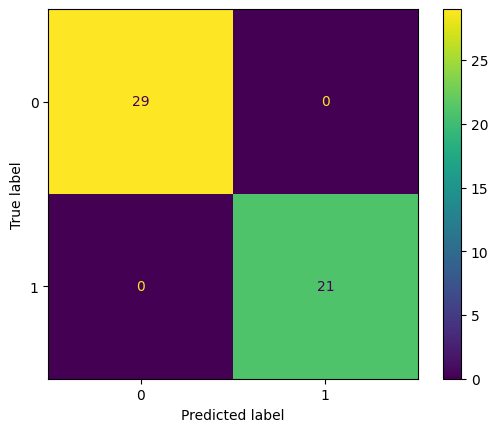

Accuracy: 1.0
Recall: [1. 1.]
Precision: [1. 1.]
F1: [1. 1.]


In [ ]:
y_test=df_top_k11["sentiment_conv"]
predicted=df_top_k11["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k11['text_del_stop_words']=df_top_k11['gen_text'].apply(del_stop_words)
docs = df_top_k11['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topics()

{0: [('hotel', 0.13899806193200448),
  ('schlecht', 0.12520091704005276),
  ('zimmer', 0.1169931558216009),
  ('essen', 0.11446128506955022),
  ('unfreundlich', 0.10344155149330969),
  ('wurde', 0.09279241966193674),
  ('personal', 0.09140084550659104),
  ('klein', 0.06992518370060619),
  ('gereinigt', 0.0683380350047158),
  ('schmutzig', 0.0638674465858414)],
 1: [('zimmer', 0.1406892352660946),
  ('gut', 0.1207419843651207),
  ('sauber', 0.1158843486339223),
  ('hotel', 0.10490170524055291),
  ('immer', 0.10131060528519498),
  ('tag', 0.08550221589994338),
  ('wasserkocher', 0.08169420026968854),
  ('wurden', 0.07532949496587263),
  ('groß', 0.07316177866885223),
  ('hilfsbereit', 0.07265945950520025)]}

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,27,0_hotel_schlecht_zimmer_essen,"[hotel, schlecht, zimmer, essen, unfreundlich,...","[Hotel . Atmosphäre Fitnesshilfe Hilfe , Hotel..."
1,1,23,1_zimmer_gut_sauber_hotel,"[zimmer, gut, sauber, hotel, immer, tag, wasse...",[Hotel . Personal freundlich hilfsbereit . imm...


In [ ]:
topic_model.visualize_heatmap()

## sft 1 rl 2

In [ ]:
df_top_k12=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_k12.tsv', sep="\t")

In [ ]:
df_top_k12["perplexity"].mean()

1.0944085301509394

In [ ]:
df_top_k12.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.100403
[positive]    1.086130
Name: perplexity, dtype: float64

In [ ]:
df_top_k12["num_keywords_used"]=df_top_k12["num_keywords"]-df_top_k12["num_keywords_not_used"]

In [ ]:
df_top_k12.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.074531
1    1.090253
2    1.085459
3    1.104796
Name: perplexity, dtype: float64

In [ ]:
df_top_k12["succses_rate"]=df_top_k12["num_keywords_used"]/df_top_k12["num_keywords"]
df_top_k12["succses_rate"].mean()

0.6466666666666666

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k12["sent_predicted_label"]=df_top_k12["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k12["sentiment_conv"]=df_top_k12["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k12["sent_predicted_label_conv"]=df_top_k12["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

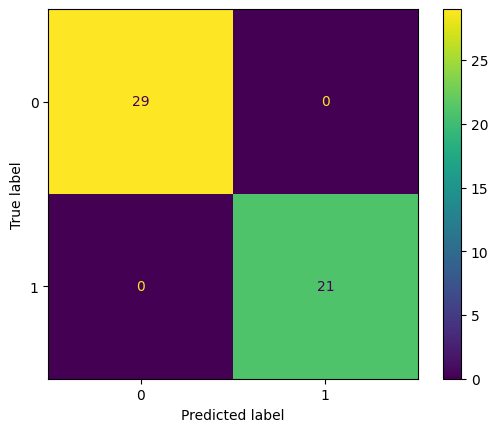

Accuracy: 1.0
Recall: [1. 1.]
Precision: [1. 1.]
F1: [1. 1.]


In [ ]:
y_test=df_top_k12["sentiment_conv"]
predicted=df_top_k12["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k12['text_del_stop_words']=df_top_k12['gen_text'].apply(del_stop_words)
docs = df_top_k12['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topics()

{0: [('hotel', 0.13069921768625883),
  ('zimmer', 0.12151422869314284),
  ('schlecht', 0.1042157657626074),
  ('katastrophe', 0.07384457351735062),
  ('essen', 0.07312324787510698),
  ('dreckig', 0.06534648747160526),
  ('unfreundlich', 0.06358085902747129),
  ('zustand', 0.06199538703535499),
  ('schlechten', 0.061502576443863775),
  ('gab', 0.06025485168493832)],
 1: [('gut', 0.16492937055004125),
  ('zimmer', 0.15579634152142136),
  ('sauber', 0.1425470757396717),
  ('hotel', 0.12688972594434214),
  ('schön', 0.11201860103927508),
  ('immer', 0.07959122723524056),
  ('personal', 0.07868579800855754),
  ('freundlich', 0.07734979960564536),
  ('essen', 0.07612750961563615),
  ('gebucht', 0.06598212996657335)]}

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,28,0_hotel_zimmer_schlecht_katastrophe,"[hotel, zimmer, schlecht, katastrophe, essen, ...",[Hotel . Hotel schlechten Zustand . Zimmer alt...
1,1,22,1_gut_zimmer_sauber_hotel,"[gut, zimmer, sauber, hotel, schön, immer, per...",[Hotel . Hotel schön Essen wirklich gut . Pers...


In [ ]:
topic_model.visualize_heatmap()

### sft 2 rl 1

In [ ]:
df_top_k21=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_k21.tsv', sep="\t")

In [ ]:
df_top_k21["perplexity"].mean()

1.0976252661283294

In [ ]:
df_top_k21.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.096649
[positive]    1.098973
Name: perplexity, dtype: float64

In [ ]:
df_top_k21["num_keywords_used"]=df_top_k21["num_keywords"]-df_top_k21["num_keywords_not_used"]

In [ ]:
df_top_k21.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.067313
1    1.108895
2    1.078090
3    1.113173
Name: perplexity, dtype: float64

In [ ]:
df_top_k21["succses_rate"]=df_top_k21["num_keywords_used"]/df_top_k21["num_keywords"]
df_top_k21["succses_rate"].mean()

0.6466666666666667

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k21["sent_predicted_label"]=df_top_k21["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k21["sentiment_conv"]=df_top_k21["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k21["sent_predicted_label_conv"]=df_top_k21["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

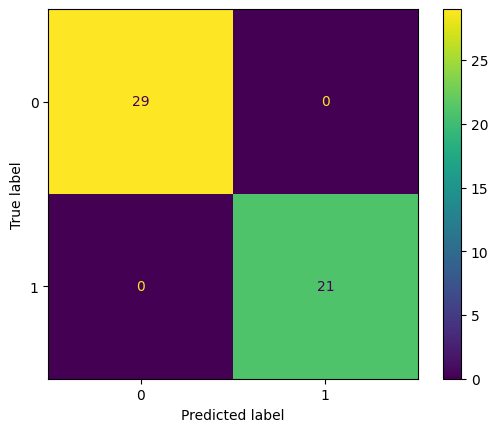

Accuracy: 1.0
Recall: [1. 1.]
Precision: [1. 1.]
F1: [1. 1.]


In [ ]:
y_test=df_top_k21["sentiment_conv"]
predicted=df_top_k21["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k21['text_del_stop_words']=df_top_k21['gen_text'].apply(del_stop_words)
docs = df_top_k21['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topics()

{-1: [('käse', 0.26213336613818494),
  ('frische', 0.2373656002082922),
  ('lage', 0.19518312873932142),
  ('abendessenbuffet', 0.1577865930925798),
  ('aufmerksam', 0.1577865930925798),
  ('fisch', 0.1577865930925798),
  ('tageszeit', 0.1577865930925798),
  ('bagütte', 0.1577865930925798),
  ('wurstsorten', 0.1577865930925798),
  ('früchte', 0.1577865930925798)],
 0: [('dreckig', 0.1222859553795222),
  ('zimmer', 0.08648017291007545),
  ('essen', 0.08066670921676367),
  ('hotel', 0.07941956199828495),
  ('gab', 0.07919126882677609),
  ('schlecht', 0.07775592234565415),
  ('unfreundlich', 0.07177107483835911),
  ('personal', 0.06578360062976349),
  ('wurde', 0.061062752040461986),
  ('wurden', 0.05946745547207123)],
 1: [('zimmer', 0.1246284232994393),
  ('sauber', 0.11096740105617263),
  ('hotel', 0.11084434067895739),
  ('immer', 0.09504638075527265),
  ('gut', 0.0912178105781326),
  ('super', 0.0823615853139399),
  ('tag', 0.0786590737285015),
  ('freundlich', 0.06638508642286439),


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1,-1_käse_frische_lage_abendessenbuffet,"[käse, frische, lage, abendessenbuffet, aufmer...",[Hotel . Ausstattung Komfortfrühstück Frühstüc...
1,0,27,0_dreckig_zimmer_essen_hotel,"[dreckig, zimmer, essen, hotel, gab, schlecht,...",[Hotel . unfreundliches Personal . Hotelanlage...
2,1,22,1_zimmer_sauber_hotel_immer,"[zimmer, sauber, hotel, immer, gut, super, tag...",[Hotel . super schön . Zimmer geräumig sauber ...


In [ ]:
topic_model.visualize_heatmap()

### sft 2 rl 2

In [ ]:
df_top_k22=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_k22.tsv', sep="\t")

In [ ]:
df_top_k22["perplexity"].mean()

1.099621448007229

In [ ]:
df_top_k22.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.111839
[positive]    1.082749
Name: perplexity, dtype: float64

In [ ]:
df_top_k22["num_keywords_used"]=df_top_k22["num_keywords"]-df_top_k22["num_keywords_not_used"]

In [ ]:
df_top_k22.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.069652
1    1.160056
3    1.103796
Name: perplexity, dtype: float64

In [ ]:
df_top_k22["succses_rate"]=df_top_k22["num_keywords_used"]/df_top_k22["num_keywords"]
df_top_k22["succses_rate"].mean()

0.6

In [ ]:
df_top_k22["gen_text"]=df_top_k22["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k22["sent_predicted_label"]=df_top_k22["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k22["sentiment_conv"]=df_top_k22["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k22["sent_predicted_label_conv"]=df_top_k22["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

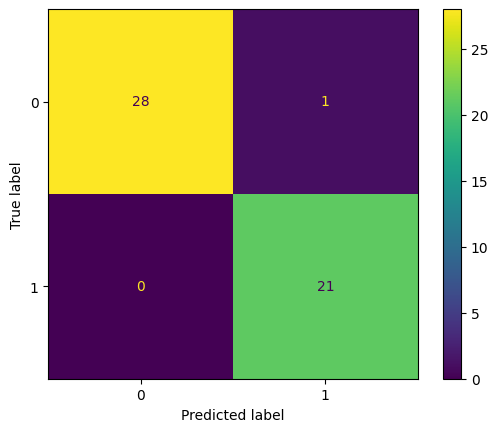

Accuracy: 0.98
Recall: [0.96551724 1.        ]
Precision: [1.         0.95454545]
F1: [0.98245614 0.97674419]


In [ ]:
y_test=df_top_k22["sentiment_conv"]
predicted=df_top_k22["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k22['text_del_stop_words']=df_top_k22['gen_text'].apply(del_stop_words)
docs = df_top_k22['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topics()

{-1: [('getränke', 0.19290116776859845),
  ('gut', 0.17014336003347602),
  ('hotel', 0.16650198937030006),
  ('tag', 0.1515446300996421),
  ('lecker', 0.15084830485126782),
  ('gab', 0.14241649579895677),
  ('konnte', 0.12185286618216062),
  ('essen', 0.11709992649809416),
  ('schlafen', 0.10673374953726329),
  ('cocktails', 0.10294224777691076)],
 0: [('gab', 0.10542519818883814),
  ('essen', 0.10402123340869664),
  ('schlecht', 0.09148985998509623),
  ('hotel', 0.0802777448749661),
  ('dreckig', 0.07449433660650792),
  ('zimmer', 0.07416768009352329),
  ('sauber', 0.0690444100814074),
  ('frühstück', 0.06303228510058839),
  ('die', 0.06249232316790802),
  ('gut', 0.05966065871303706)],
 1: [('immer', 0.12395099283479742),
  ('zimmer', 0.1070387959109728),
  ('sauber', 0.10261533658321172),
  ('gut', 0.10237769035157158),
  ('hotel', 0.0873421864239631),
  ('freundlich', 0.06566775536238201),
  ('personal', 0.06129099844481966),
  ('animation', 0.06066288638212729),
  ('wurden', 0.058

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3,-1_getränke_gut_hotel_tag,"[getränke, gut, hotel, tag, lecker, gab, konnt...",[Hotel . Frechheit Hotel viele Russen untergeb...
1,0,24,0_gab_essen_schlecht_hotel,"[gab, essen, schlecht, hotel, dreckig, zimmer,...",[Hotel . Essen schlecht . Personal total unfre...
2,1,23,1_immer_zimmer_sauber_gut,"[immer, zimmer, sauber, gut, hotel, freundlich...",[Hotel . schön schönen Urlaub . Personal freun...


In [ ]:
topic_model.visualize_heatmap()

##GPT with sentiment token

In [ ]:
df_top_k_gpt=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_k_gpt.tsv', sep="\t")

In [ ]:
df_top_k_gpt.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.106760
[positive]    3.268611
Name: perplexity, dtype: float64

In [ ]:
df_top_k_gpt["perplexity"].mean()

2.0147371627417243

In [ ]:
df_top_k_gpt["num_keywords_used"]=df_top_k_gpt["num_keywords"]-df_top_k_gpt["num_keywords_not_used"]


In [ ]:
df_top_k_gpt.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0     1.088625
1    10.151550
3     1.114035
Name: perplexity, dtype: float64

In [ ]:
df_top_k_gpt.sort_values(by=["perplexity"],ascending=False).head(2)["text"].values

26    [positive] Wir waren in diesem Hotel. Alles wa...
14    [negative] Wir waren in diesem Hotel. Was für ...
Name: text, dtype: object

In [ ]:
df_top_k_gpt["succses_rate"]=df_top_k_gpt["num_keywords_used"]/df_top_k_gpt["num_keywords"]
np.mean(df_top_k_gpt["succses_rate"])

0.7266666666666667

In [ ]:
df_top_k_gpt["gen_text"]=df_top_k_gpt["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k_gpt["sent_predicted_label"]=df_top_k_gpt["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k_gpt["sentiment_conv"]=df_top_k_gpt["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k_gpt["sent_predicted_label_conv"]=df_top_k_gpt["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

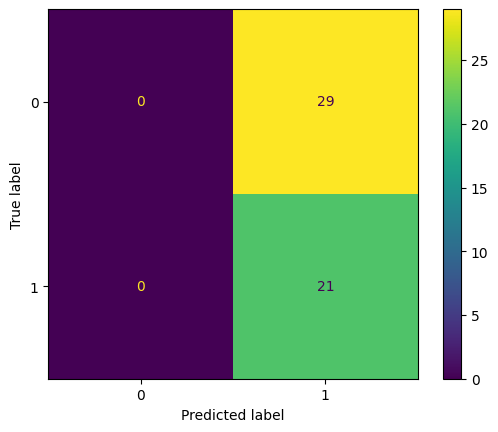

Accuracy: 0.42
Recall: [0. 1.]
Precision: [0.   0.42]
F1: [0.        0.5915493]


In [ ]:
y_test=df_top_k_gpt["sentiment_conv"]
predicted=df_top_k_gpt["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k_gpt['text_del_stop_words']=df_top_k_gpt['gen_text'].apply(del_stop_words)
docs = df_top_k_gpt['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)


In [ ]:
topic_model.get_topics()

{-1: [('pool', 0.2802099112064802),
  ('hotel', 0.16303523559728464),
  ('wasserkocher', 0.15762211221094163),
  ('zimmer', 0.1326464692648079),
  ('sauber', 0.11907185397836577),
  ('gut', 0.11472264524175389),
  ('frühstück', 0.0951752352253049),
  ('leistungsmässig', 0.08400473883480881),
  ('freundlich', 0.060832805044462944),
  ('personal', 0.056385411745779074)]}

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,50,-1_pool_hotel_wasserkocher_zimmer,"[pool, hotel, wasserkocher, zimmer, sauber, gu...",[Hotel . Pool Pool Pool Pool Pool Pool Pool Po...


##GPT without sentiment token

In [ ]:
df_top_k_gpt=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_k_gpt_without_sentiment.tsv', sep="\t")

In [ ]:
df_top_k_gpt.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.121119
[positive]    1.114637
Name: perplexity, dtype: float64

In [ ]:
df_top_k_gpt["perplexity"].mean()

1.118396257823559

In [ ]:
df_top_k_gpt["num_keywords_used"]=df_top_k_gpt["num_keywords"]-df_top_k_gpt["num_keywords_not_used"]


In [ ]:
df_top_k_gpt.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.093910
1    1.128122
3    1.134013
Name: perplexity, dtype: float64

In [ ]:
df_top_k_gpt.sort_values(by=["perplexity"],ascending=False).head(2)["text"].values

array([' Wir waren in diesem Hotel. Alles sehr sauber und komfortabel. Kaffee und Tee sind gut. Wasserkocher Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Wasserkocher Wasserkocher Kaffeemaschine Wasserkocher Wasserkocher Wasserkocher Wasserkocher Wasserkocher Kaffeemaschine Wasserkocher Wasserkocher Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Wasserkocher Wasserkocher Kaffeemaschine Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffeemaschine Wasserkocher Kaffe

In [ ]:
df_top_k_gpt["succses_rate"]=df_top_k_gpt["num_keywords_used"]/df_top_k_gpt["num_keywords"]
np.mean(df_top_k_gpt["succses_rate"])

0.8

In [ ]:
df_top_k_gpt["gen_text"]=df_top_k_gpt["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k_gpt["sent_predicted_label"]=df_top_k_gpt["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k_gpt["sentiment_conv"]=df_top_k_gpt["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k_gpt["sent_predicted_label_conv"]=df_top_k_gpt["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

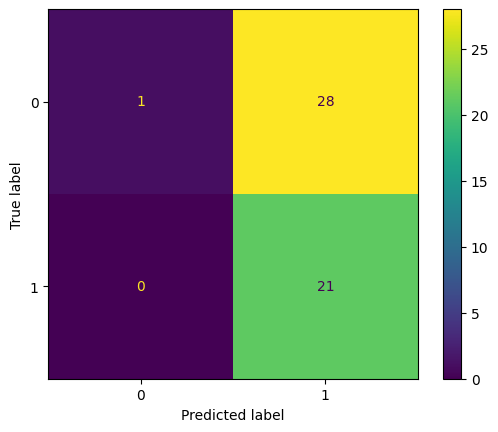

Accuracy: 0.44
Recall: [0.03448276 1.        ]
Precision: [1.         0.42857143]
F1: [0.06666667 0.6       ]


In [ ]:
y_test=df_top_k_gpt["sentiment_conv"]
predicted=df_top_k_gpt["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k_gpt['text_del_stop_words']=df_top_k_gpt['gen_text'].apply(del_stop_words)
docs = df_top_k_gpt['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)


.gitattributes:   0%|          | 0.00/968 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topics()

{-1: [('hotel', 0.17597798759793173),
  ('gut', 0.1454499981547785),
  ('zimmer', 0.13139627713183977),
  ('sauber', 0.10915033082385432),
  ('wasserkocher', 0.1016209253320705),
  ('kaffeemaschine', 0.08287530216054168),
  ('freundlich', 0.07860772993549524),
  ('frühstück', 0.07570597282025314),
  ('personal', 0.07423718911240704),
  ('lage', 0.07275603576073003)]}

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,50,-1_hotel_gut_zimmer_sauber,"[hotel, gut, zimmer, sauber, wasserkocher, kaf...",[Hotel . Hotel liegt wenige Minuten Strand ent...
